In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-32m.zip


--2025-12-04 04:21:19--  https://files.grouplens.org/datasets/movielens/ml-32m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238950008 (228M) [application/zip]
Saving to: ‘ml-32m.zip.4’

ml-32m.zip.4        100%[===================>] 227.88M  1.54MB/s    in 58s     

2025-12-04 04:22:18 (3.90 MB/s) - ‘ml-32m.zip.4’ saved [238950008/238950008]



In [ ]:
!ls


kaggle.json  ml-32m.zip    ml-32m.zip.2  ml-32m.zip.4
ml32m	     ml-32m.zip.1  ml-32m.zip.3  sample_data


In [ ]:
!unzip ml-32m.zip -d ml32m


Archive:  ml-32m.zip
error [ml-32m.zip]:  missing 51380224 bytes in zipfile
  (attempting to process anyway)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
!ls


kaggle.json  ml-32m.zip    ml-32m.zip.2  ml-32m.zip.4
ml32m	     ml-32m.zip.1  ml-32m.zip.3  sample_data


# Movie Recommendation System using MovieLens 32M

This notebook is part of an end-to-end data science project built on the MovieLens 32M dataset.  
In this notebook, we focus on:

- Loading the raw data  
- Understanding the structure of the datasets (movies, ratings, tags, links)  
- Performing initial exploratory data analysis (EDA)  
- Preparing the data for building a movie recommendation system in later steps.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("default")
pd.set_option("display.max_columns", 50)

In [ ]:
# Load MovieLens 32M dataset

movies_path = "ml32m/ml-32m/movies.csv"
ratings_path = "ml32m/ml-32m/ratings.csv"
tags_path    = "ml32m/ml-32m/tags.csv"
links_path   = "ml32m/ml-32m/links.csv"

movies  = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)
tags    = pd.read_csv(tags_path)
links   = pd.read_csv(links_path)

movies.head(), ratings.head()


(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating  timestamp
 0       1       17     4.0  944249077
 1       1       25     1.0  944250228
 2       1       29     2.0  943230976
 3       1       30     5.0  944249077
 4       1       32     5.0  943228858)

In [ ]:
print("Movies:", movies.shape)
print("Ratings:", ratings.shape)
print("Tags:", tags.shape)
print("Links:", links.shape)

print("\nMovies info:")
print(movies.info())

print("\nRatings info:")
print(ratings.info())


Movies: (87585, 3)
Ratings: (32000204, 4)
Tags: (2000072, 4)
Links: (87585, 3)

Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None

Ratings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None


## 1. Dataset Overview

The MovieLens 32M dataset contains information about:

- **Movies**: basic metadata such as title and genres  
- **Ratings**: explicit ratings that users have given to movies  
- **Tags**: user-generated tags for movies  
- **Links**: mapping between MovieLens IDs and external IDs (IMDb, TMDb)

In this section, we will:
- Inspect the first few rows of each table  
- Check the number of rows and columns  
- Look at data types and missing values


In [ ]:
print("Movies sample:")
display(movies.head())

print("\nRatings sample:")
display(ratings.head())

print("\nTags sample:")
display(tags.head())

print("\nLinks sample:")
display(links.head())


Movies sample:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Ratings sample:


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858



Tags sample:


,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102



Links sample:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
print("Missing values in movies:")
print(movies.isna().sum())

print("\nMissing values in ratings:")
print(ratings.isna().sum())

print("\nMissing values in tags:")
print(tags.isna().sum())

print("\nMissing values in links:")
print(links.isna().sum())


Missing values in movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in tags:
userId        0
movieId       0
tag          17
timestamp     0
dtype: int64

Missing values in links:
movieId      0
imdbId       0
tmdbId     124
dtype: int64


## 2. Ratings Distribution

Before building any recommendation system, it's important to understand how users rate movies.
Here we explore the distribution of rating values.


In [ ]:
ratings['rating'].describe()


,rating
count,3.200020e+07
mean,3.540396e+00
std,1.058986e+00
min,5.000000e-01
25%,3.000000e+00
50%,3.500000e+00
75%,4.000000e+00
max,5.000000e+00


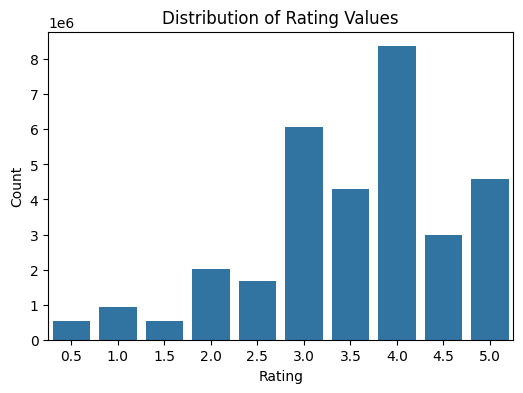

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=ratings)
plt.title("Distribution of Rating Values")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## 3. User Activity Analysis

To understand user behavior, we check how many ratings each user has given.
Highly active users and very inactive users can affect recommendations,
so it’s important to analyze the distribution of user activity.


In [ ]:
user_activity = ratings.groupby('userId')['rating'].count().sort_values(ascending=False)
user_activity.head()


,rating
userId,
175325,33332
17035,9577
55653,9178
123465,9044
171795,9016


In [ ]:
user_activity.describe()


,rating
count,200948.000000
mean,159.246193
std,282.025462
min,20.000000
25%,36.000000
50%,73.000000
75%,167.000000
max,33332.000000


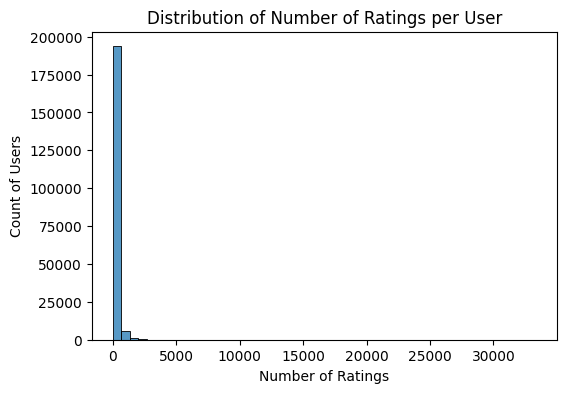

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(user_activity, bins=50, kde=False)
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Users")
plt.show()


## 4. Movie Popularity Analysis

Movies with more ratings are generally more reliable for recommendations.  
Here, we analyze how many ratings each movie has received and identify the most popular movies in the dataset.
Here we:
- Count how many ratings each movie received
- Analyze popularity distribution
- Identify the top-rated (most popular) movies

In [ ]:
movie_popularity = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False)
movie_popularity.head()


,rating
movieId,
318,102929
356,100296
296,98409
2571,93808
593,90330


In [ ]:
movie_popularity.describe()


,rating
count,84432.000000
mean,379.005638
std,2592.439791
min,1.000000
25%,2.000000
50%,5.000000
75%,25.000000
max,102929.000000


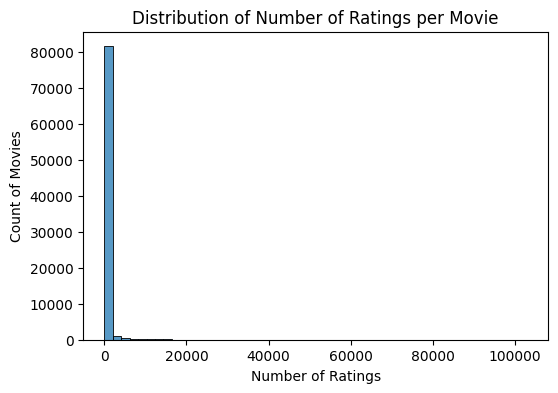

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(movie_popularity, bins=50)
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Movies")
plt.show()


In [ ]:
top_movies = movie_popularity.head(10).reset_index()
top_movies = top_movies.merge(movies, on='movieId', how='left')
top_movies[['movieId', 'title', 'rating']]


,movieId,title,rating
0,318,"Shawshank Redemption, The (1994)",102929
1,356,Forrest Gump (1994),100296
2,296,Pulp Fiction (1994),98409
3,2571,"Matrix, The (1999)",93808
4,593,"Silence of the Lambs, The (1991)",90330
5,260,Star Wars: Episode IV - A New Hope (1977),85010
6,2959,Fight Club (1999),77332
7,480,Jurassic Park (1993),75233
8,527,Schindler's List (1993),73849
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",73122


## 5. Genre Analysis

Each movie in the MovieLens dataset can belong to multiple genres.  
Understanding genre distribution helps us explore:

- Which genres are most common  
- How movies are spread across different categories  
- How genre frequency might affect recommendations  

We will split the genre strings, count genre occurrences, and visualize the results.


In [ ]:
# Split genre strings into lists
movies['genre_list'] = movies['genres'].str.split('|')

# Explode to make one row per genre
genre_exploded = movies.explode('genre_list')
genre_exploded.head()


,movieId,title,genres,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Fantasy


In [ ]:
genre_counts = genre_exploded['genre_list'].value_counts()
genre_counts


,count
genre_list,
Drama,34175
Comedy,23124
Thriller,11823
Romance,10369
Action,9668
Documentary,9363
Horror,8654
(no genres listed),7080
Crime,6976


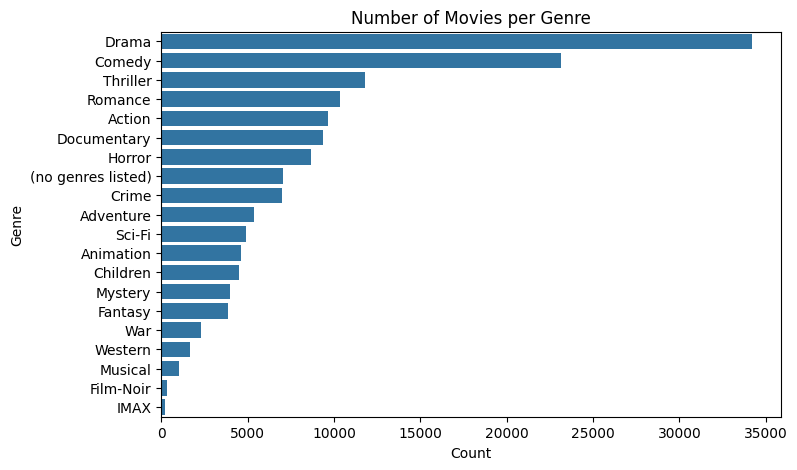

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Number of Movies per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


### Handling Large-Scale Data in Limited RAM

The full ratings table contains tens of millions of rows.  
Some operations (like merging all ratings with exploded genres) can exceed the RAM limits in a Colab environment.

To keep the analysis manageable, we work with a random sample of the ratings (e.g., 10% of the data).  
This provides a good approximation of the trends while avoiding memory crashes.


In [ ]:
# Take a 10% sample of ratings to avoid RAM crash
sampled_ratings = ratings.sample(frac=0.1, random_state=42)

genre_ratings_sampled = genre_exploded[['movieId', 'genre_list']].merge(
    sampled_ratings[['movieId', 'rating']],
    on='movieId'
)

genre_mean_ratings = genre_ratings_sampled.groupby('genre_list')['rating'].mean().sort_values(ascending=False)
genre_mean_ratings


,rating
genre_list,
Film-Noir,3.918494
War,3.794009
Documentary,3.694026
Crime,3.691298
Drama,3.682203
Mystery,3.674561
Animation,3.611748
Western,3.597910
IMAX,3.592812


The bar chart below shows the number of movies available in each genre.  
We can see which genres dominate the catalog (e.g., Drama, Comedy) and which are more niche.


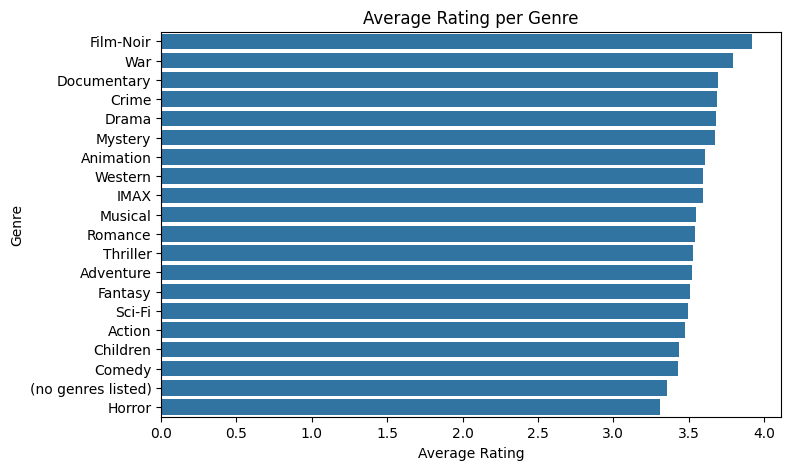

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=genre_mean_ratings.values, y=genre_mean_ratings.index)
plt.title("Average Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


## 6. Baseline Recommendation: Popular Movies

Before building personalized recommendation models, it is useful to create a simple baseline.

In this section, we build a **global popularity-based recommender**:

- We count how many ratings each movie has received  
- We compute the average rating for each movie  
- We filter out movies with too few ratings (to avoid noisy estimates)  
- We rank movies by their average rating and rating count

This gives us a list of "top-N popular movies" that could be recommended to any new user as a starting point.


In [ ]:
# Aggregate number of ratings and mean rating per movie
movie_stats = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

movie_stats.head()


,movieId,rating_count,rating_mean
0,1,68997,3.897438
1,2,28904,3.275758
2,3,13134,3.139447
3,4,2806,2.845331
4,5,13154,3.059602


In [ ]:
min_ratings = 200

popular_movies = movie_stats.query("rating_count >= @min_ratings")
popular_movies.shape


(9322, 3)

The table below shows the **top 10 globally popular movies**, filtered to include only movies with at least a minimum number of ratings (here: 200).

These movies:

- Have a **high average rating**
- Are rated by **many users**, making the scores more reliable
- Form a strong **baseline recommendation list** for new users with no history (cold start).


In [ ]:
popular_movies_sorted = popular_movies.sort_values(
    by=['rating_mean', 'rating_count'],
    ascending=[False, False]
)

popular_with_titles = popular_movies_sorted.merge(
    movies[['movieId', 'title', 'genres']],
    on='movieId',
    how='left'
)

popular_with_titles.head(10)


,movieId,rating_count,rating_mean,title,genres
0,171011,1956,4.446830,Planet Earth II (2016),Documentary
1,159817,2948,4.444369,Planet Earth (2006),Documentary
2,170705,2811,4.426539,Band of Brothers (2001),Action|Drama|War
3,318,102929,4.404614,"Shawshank Redemption, The (1994)",Crime|Drama
4,171495,615,4.330081,Cosmos,(no genres listed)
5,858,66440,4.317030,"Godfather, The (1972)",Crime|Drama
6,202439,11670,4.312254,Parasite (2019),Comedy|Drama
7,179135,1163,4.300086,Blue Planet II (2017),Documentary
8,198185,1140,4.298684,Twin Peaks (1989),Drama|Mystery
9,220528,449,4.286192,Twelve Angry Men (1954),Drama


In [ ]:
def get_popular_recommendations(
    ratings_df,
    movies_df,
    min_ratings=200,
    top_n=10
):
    """
    Return top-N globally popular movies based on average rating and rating count.
    Only movies with at least `min_ratings` ratings are included.
    """
    movie_stats = ratings_df.groupby('movieId').agg(
        rating_count=('rating', 'count'),
        rating_mean=('rating', 'mean')
    ).reset_index()

    filtered = movie_stats.query("rating_count >= @min_ratings")

    sorted_movies = filtered.sort_values(
        by=['rating_mean', 'rating_count'],
        ascending=[False, False]
    )

    result = sorted_movies.merge(
        movies_df[['movieId', 'title', 'genres']],
        on='movieId',
        how='left'
    )

    return result.head(top_n)


In [ ]:
popular_20 = get_popular_recommendations(
    ratings_df=ratings,
    movies_df=movies,
    min_ratings=200,
    top_n=20
)

popular_20


,movieId,rating_count,rating_mean,title,genres
0,171011,1956,4.446830,Planet Earth II (2016),Documentary
1,159817,2948,4.444369,Planet Earth (2006),Documentary
2,170705,2811,4.426539,Band of Brothers (2001),Action|Drama|War
3,318,102929,4.404614,"Shawshank Redemption, The (1994)",Crime|Drama
4,171495,615,4.330081,Cosmos,(no genres listed)
5,858,66440,4.317030,"Godfather, The (1972)",Crime|Drama
6,202439,11670,4.312254,Parasite (2019),Comedy|Drama
7,179135,1163,4.300086,Blue Planet II (2017),Documentary
8,198185,1140,4.298684,Twin Peaks (1989),Drama|Mystery
9,220528,449,4.286192,Twelve Angry Men (1954),Drama


## 7. Summary

In this notebook, we:

- Loaded the MovieLens 32M dataset (movies, ratings, tags, links)
- Performed basic exploratory data analysis:
  - Checked dataset shapes, data types, and missing values
  - Explored the distribution of rating values
  - Analyzed user activity (number of ratings per user)
  - Analyzed movie popularity (number of ratings per movie)
  - Explored the distribution of movie genres
- Built a **baseline popularity-based recommender**, which:
  - Filters out movies with too few ratings
  - Ranks movies by average rating and rating count
  - Provides a simple "Top-N popular movies" recommendation list

In the next step, we can move towards **personalized recommendations**, such as:
- User–item collaborative filtering
- Item–item similarity-based recommendations
- Matrix factorization-based models
